Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from snowline import ReactiveImportanceSampler

sampler = ReactiveImportanceSampler(paramnames, loglike, transform)

sampler.run()

[snowline]     from: [0.545481   0.53863454]


[snowline]     error: [0.04 0.04]


FCN = 4.9056625564032136e-09 
 TOTAL NCALL = 33 
 NCALLS = 33 
 
 
 EDM = 4.9056625619188556e-09 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.55,0.000999999,,,0,1,No
1,x1,0.55,0.000999999,,,0,1,No


Maximum likelihood: L = -0.0 at:
    Hinz                0.5000 +- 0.0100
    Kunz                0.5000 +- 0.0100


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.55,0.000999999,,,0,1,No
1,x1,0.55,0.000999999,,,0,1,No


+,x0,x1
x0,1.00,0.00
x1,0.00,1.00


[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 69.587%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 12 to 2 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1254


[snowline] Status: Have 662 total effective samples, done.



logZ = -12.005 +- 0.016

    Hinz                0.500 +- 0.010
    Kunz                0.499 +- 0.010


{'z': 6.110698264882551e-06,
 'zerr': 9.853370867640594e-08,
 'logz': -12.00546950900566,
 'logzerr': 0.01599616358289424,
 'ess': 0.8279879816290282,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 1254,
 'posterior': {'mean': [0.5004802534654135, 0.49920408744224476],
  'stdev': [0.010104717166543464, 0.010281916957082974],
  'median': [0.5000478655164278, 0.4987696962090693],
  'errlo': [0.49072977530226236, 0.4894275403548569],
  'errup': [0.510378455372682, 0.509483926432976]},
 'samples': array([[0.52182615, 0.48200881],
        [0.49541462, 0.48953498],
        [0.4904001 , 0.4927262 ],
        ...,
        [0.48891261, 0.49319927],
        [0.49863911, 0.48507321],
        [0.49218249, 0.49401016]])}

This gave us error estimates and even estimated the evidence (Z)!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 1254 times.


Visualisation
--------------------

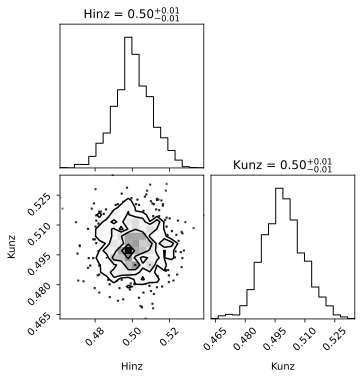

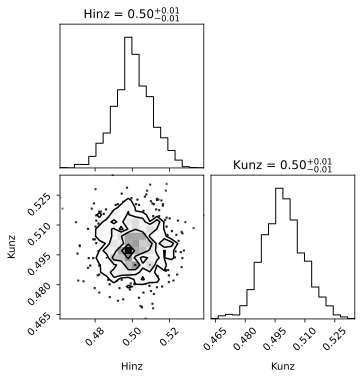

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

sampler = ReactiveImportanceSampler(paramnames, loglike_rosen, transform=transform_rosen)
sampler.run(min_ess=1000, max_ncalls=1000000)


[snowline]     from: [0.49831679 0.50638311]


[snowline]     error: [0.04 0.04]


FCN = 2.8269978040397402e-05 
 TOTAL NCALL = 115 
 NCALLS = 115 
 
 
 EDM = 2.8900773844677625e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.549818,0.0252848,,,0,1,No
1,x1,0.549641,0.0503827,,,0,1,No


Maximum likelihood: L = -0.0 at:
    Hinz                1.00 +- 0.51
    Kunz                1.0 +- 1.0


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.549818,0.0254306,,,0,1,No
1,x1,0.549641,0.0506724,,,0,1,No


+,x0,x1
x0,1.00,1.00
x1,1.00,1.00


[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 16.921%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 5 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1338


[snowline] Status: Have 23 total effective samples, sampling 560 next.


[snowline]     sampling efficiency: 2.995%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 3 components


[snowline] Importance sampling 560 ...


[snowline] Likelihood function evaluations: 1898


[snowline] Status: Have 422 total effective samples, sampling 784 next.


[snowline]     sampling efficiency: 31.042%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 3 components


[snowline] Importance sampling 784 ...


[snowline] Likelihood function evaluations: 2682


[snowline] Status: Have 421 total effective samples, sampling 1097 next.


[snowline]     sampling efficiency: 19.660%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 5 components


[snowline] Importance sampling 1097 ...


[snowline] Likelihood function evaluations: 3779


[snowline] Status: Have 1133 total effective samples, done.



logZ = -8.271 +- 0.024

    Hinz                1.07 +- 0.27
    Kunz                1.20 +- 0.57


{'z': 0.00025592004045116984,
 'zerr': 6.128896975053338e-06,
 'logz': -8.270645504261248,
 'logzerr': 0.02366621668565294,
 'ess': 0.34986604098728785,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 3779,
 'posterior': {'mean': [1.0651486205637988, 1.201153721418895],
  'stdev': [0.26505749294377934, 0.572377695543595],
  'median': [1.0576806429639518, 1.1209711136772604],
  'errlo': [0.7700276440348812, 0.5751827729787031],
  'errup': [1.3683335675084667, 1.8792483953078332]},
 'samples': array([[0.85186612, 0.79739727],
        [1.53903116, 2.34700737],
        [0.96235459, 0.95429697],
        ...,
        [1.24653111, 1.59994037],
        [1.15059849, 1.30441501],
        [0.76194241, 0.54638523]])}

This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 3779 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]


Removed no burn in


(-0.5, 4.0)

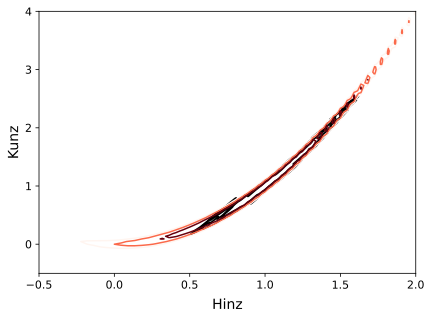

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


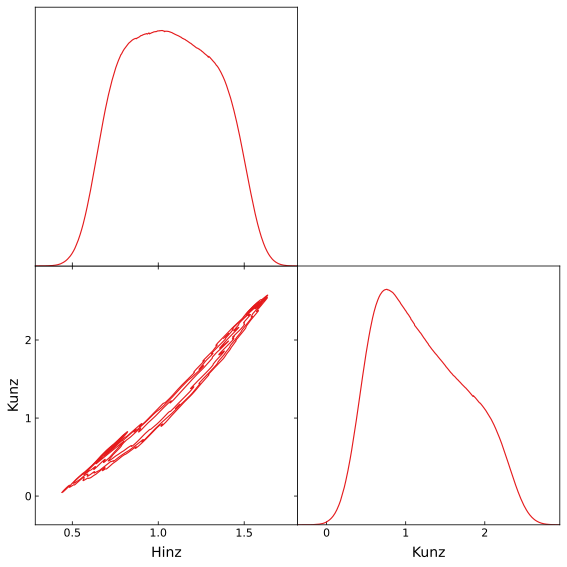

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);